Knapsack Problem Solution:
----------------------------
Best Total Value: 3953
Total Weight of Selected Items: 1498
Total Capacity: 1500
Number of Iterations: 100


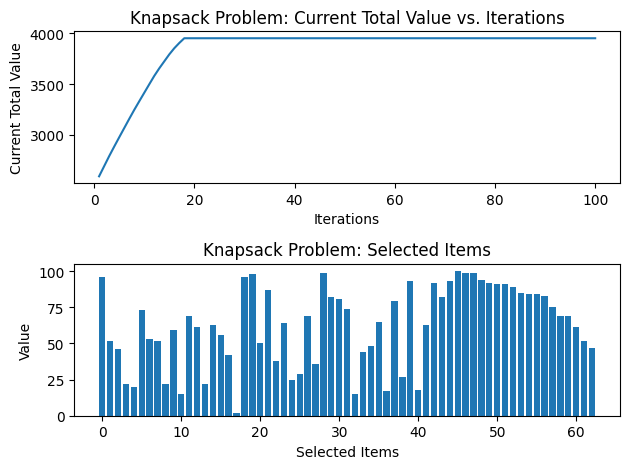

In [157]:
import csv
import random
import matplotlib.pyplot as plt

class KnapsackProblem:
    def __init__(self, weights, values, capacity):
        self.weights = weights
        self.values = values
        self.capacity = capacity
        self.num_items = len(weights)
        self.selected_items = []
        self.total_value = 0

    def calculate_value(self, selected_items):
        total_value = sum(self.values[i] for i in selected_items)
        return total_value
    #     return history
    def steepest_ascent_hill_climbing(self, iterations):
        current_items = []
        current_value = 0

        # Generate initial random solution
        for i in range(self.num_items):
            if random.random() < 0.5:
                current_items.append(i)
                current_value += self.values[i]

        # Perform hill climbing iterations
        history = []  # Track best total value at each iteration
        for _ in range(iterations):
            best_value = current_value
            best_items = current_items

            # Evaluate neighbors and select the best move
            for i in range(self.num_items):
                if i not in current_items:
                    new_items = current_items + [i]
                    new_value = self.calculate_value(new_items)

                    if new_value > best_value and sum(self.weights[j] for j in new_items) <= self.capacity:
                        best_value = new_value
                        best_items = new_items

            # Check if there is an improvement
            if best_value > current_value:
                current_value = best_value
                current_items = best_items

            history.append(current_value)  # Append best total value at each iteration

        self.total_value = current_value
        self.selected_items = current_items

        return history
    def check_weight(self, items):
        total_weight = sum(self.weights[k] for k in items)
        return total_weight <= self.capacity
    def solve(self, iterations=1000):
        history = self.steepest_ascent_hill_climbing(iterations)
        return self.total_value, self.selected_items, history

def main():
    # Read data from CSV file
    weights = []
    values = []

    with open('knapsack.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row
        for row in csv_reader:
            weights.append(int(row[0]))
            values.append(int(row[1]))

    # Set capacity for the knapsack
    capacity = 1500  # Set the desired capacity value here

    # Set number of iterations for the algorithm
    iterations = 100

    # Solve the knapsack problem
    knapsack = KnapsackProblem(weights, values, capacity)
    total_value, selected_items, history = knapsack.solve(iterations)

    # Calculate the total weight of the selected items
    total_weight = sum(weights[i] for i in selected_items)

    print("Knapsack Problem Solution:")
    print("----------------------------")
    print("Best Total Value:", total_value)
    print("Total Weight of Selected Items:", total_weight)
    print("Total Capacity:", capacity)
    print("Number of Iterations:", iterations)

    # Plot the current total value vs. iterations
    plt.subplot(2, 1, 1)
    plt.plot(range(1, iterations + 1), history)
    plt.xlabel("Iterations")
    plt.ylabel("Current Total Value")
    plt.title("Knapsack Problem: Current Total Value vs. Iterations")

    # Plot the selected items
    plt.subplot(2, 1, 2)
    x = range(len(selected_items))
    y = [values[i] for i in selected_items]
    plt.bar(x, y)
    plt.xlabel("Selected Items")
    plt.ylabel("Value")
    plt.title("Knapsack Problem: Selected Items")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

if __name__ == "__main__":
    main()